<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/thermal_power_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

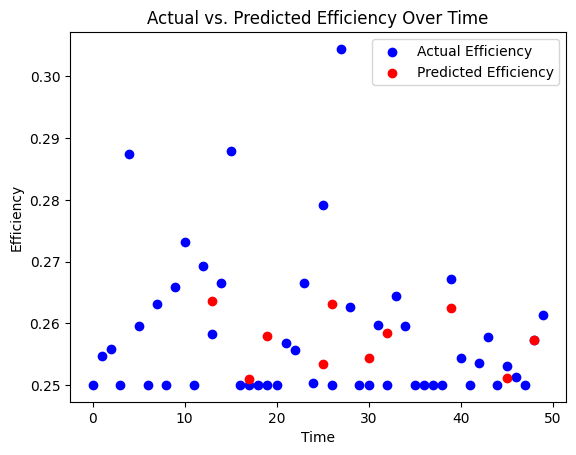


Model Evaluation:
Mean Absolute Error: 0.007241774466572165

Predicted vs. Actual:
      Actual  Predicted
13  0.258308   0.263591
39  0.267166   0.262503
30  0.250000   0.254405
45  0.253123   0.251153
17  0.250000   0.250924
48  0.257232   0.257316
26  0.250000   0.263160
25  0.279104   0.253459
32  0.250000   0.258349
19  0.250000   0.257934

Model saved as 'thermal_power_plant_model.joblib'


In [8]:
#Surrogate modelling of thermal power plant

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with a time-related variable
num_samples = 50

data = {
    'Time': np.arange(num_samples),  # Synthetic time variable
    'T_inlet': np.random.uniform(600, 1000, num_samples),
    'P_ratio': np.random.uniform(15, 25, num_samples),
    'Fuel_HV': np.random.uniform(45, 65, num_samples),
    'T_ambient': np.random.uniform(350, 450, num_samples)
}

# Calculate efficiency using a modified equation with some noise
data['Efficiency'] = 0.25 + 0.1 * (data['T_ambient'] / data['T_inlet']) * (1 / data['P_ratio']) * (1 / data['Fuel_HV']) + np.random.normal(0, 0.02, num_samples)

# Clip efficiency values to ensure they fall within the desired range
data['Efficiency'] = np.clip(data['Efficiency'], 0.25, 0.35)

# Create a DataFrame
df = pd.DataFrame(data)

# Split the dataset into features (X) and target variable (y)
X = df[['T_inlet', 'P_ratio', 'Fuel_HV', 'T_ambient']]
y = df['Efficiency']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a surrogate model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Scatter plot of actual and predicted efficiency values over time
plt.scatter(df['Time'], df['Efficiency'], label='Actual Efficiency', color='blue')
plt.scatter(df['Time'].iloc[X_test.index], predictions, label='Predicted Efficiency', color='red')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('Actual vs. Predicted Efficiency Over Time')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae}")

# Print the predicted vs. actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("\nPredicted vs. Actual:")
print(results)

# Save the trained model using joblib
joblib.dump(model, 'thermal_power_plant_model.joblib')
print("\nModel saved as 'thermal_power_plant_model.joblib'")
